In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,\
                            r2_score,median_absolute_error,explained_variance_score


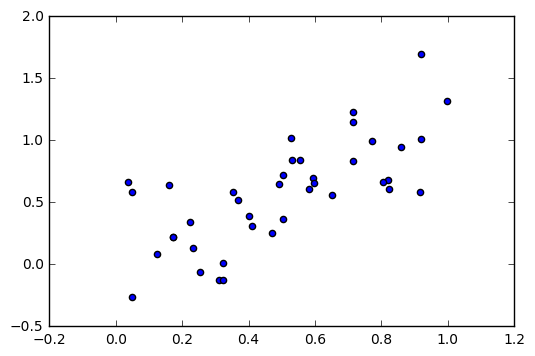

In [10]:
# don't worry about the code in this cell--it's just used to synthesize some data
def test_func(x, err=.5):
    y = np.random.normal(x, err)
    return y
def make_data(N=40, error=1.0):
    # randomly sample the data
    X = np.random.random(N)[:, None]
    y = test_func(X.ravel(), error)
    
    return X, y
X, y = make_data(40, error=.3)
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y)
plt.plot(X.ravel(), y)

plt.show()

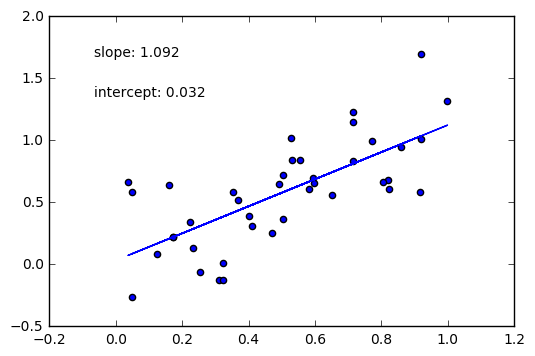

In [34]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
plt.scatter(X.ravel(), y)
plt.plot(X.ravel(), y_pred)
plt.figtext(.2,.8,"slope: {:.3f}".format(model.coef_[0]))
plt.figtext(.2,.7,"intercept: {:.3f}".format(model.intercept_))
plt.show()


### Mean Absolute Error (MAE)

The mean absolute error is an average of the absolute errors of the predicted values from the ground truth values.The mean absolute error used the same scale as the data being measured. This is known as a scale-dependent accuracy measure and therefore cannot be used to make comparisons between series using different scales.

In small scales where your errors are less than 1 because the values themselves are small, taking just the absolute might not give the best feedback mechanism to the algorithm.

**A rule of thumb:** If "2x error" is less than or equal to twice as bad as an "x error", use MAE.

### Mean Squared Error (MSE)

Mean squared error is the average of the squared errors in the predicted and ground truth data. It is _not_ in the same scale as the data. The MSE is the second moment of the error, and thus incorporates both the variance of the estimator and its bias. MSE is very **sensitive to outliers**. 

Sometimes the square root of the MSE is taken, this is known as the **RMSE** and has the advantange of being in the same units of your data. 

### Coefficient of Determination ( R² score)

It provides a measure of how well future samples are likely to be predicted by the model. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable. R-squared has some relation to the variance of the model (https://en.wikipedia.org/wiki/Coefficient_of_determination#As_explained_variance) but in general it cannot determine whether the coefficient estimates and predictions are biased. 

Check out this **awesome** blog post on R2 for more info: http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

In [55]:
print "Mean Squared Error:       {:.4}".format(mean_squared_error(y,y_pred))
print "Mean Absolute Error:      {:.4}".format(mean_absolute_error(y,y_pred))
print "r2:                       {:.4}".format(r2_score(y,y_pred))
print "Explained Variance Score: {:.4}".format(explained_variance_score(y,y_pred))

Mean Squared Error:       0.08659
Mean Absolute Error:      0.2339
r2:                       0.5018
Explained Variance Score: 0.5018


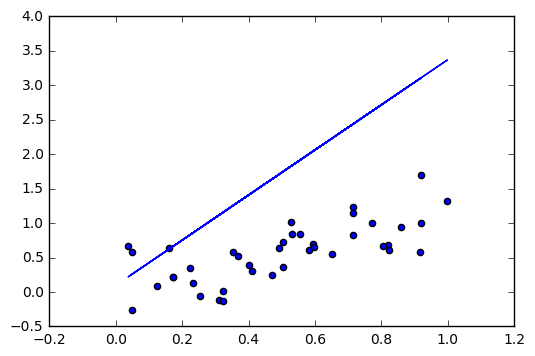

Mean Squared Error:       1.767
Mean Absolute Error:      1.194
r2:                       -9.166
Explained Variance Score: -1.505


In [56]:
y_steeper = y_pred * 3
plt.scatter(X.ravel(), y)
plt.plot(X.ravel(), y_steeper)
plt.show()
print "Mean Squared Error:       {:.4}".format(mean_squared_error(y,y_steeper))
print "Mean Absolute Error:      {:.4}".format(mean_absolute_error(y,y_steeper))
print "r2:                       {:.4}".format(r2_score(y,y_steeper))
print "Explained Variance Score: {:.4}".format(explained_variance_score(y,y_steeper))

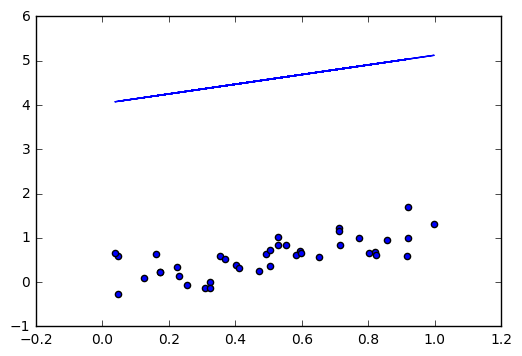

Mean Squared Error:       16.09
Mean Absolute Error:      4.0
r2:                       -91.56
Explained Variance Score: 0.5018


In [57]:
y_higher = y_pred + 4
plt.scatter(X.ravel(), y)
plt.plot(X.ravel(), y_higher)
plt.show()
print "Mean Squared Error:       {:.4}".format(mean_squared_error(y,y_higher))
print "Mean Absolute Error:      {:.4}".format(mean_absolute_error(y,y_higher))
print "r2:                       {:.4}".format(r2_score(y,y_higher))
print "Explained Variance Score: {:.4}".format(explained_variance_score(y,y_higher))

Sources:
https://www.quora.com/What-is-the-difference-between-squared-error-and-absolute-error
https://www.quora.com/Are-there-instances-where-root-mean-squared-error-might-be-used-rather-than-mean-absolute-error
http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
https://www.quora.com/Are-there-instances-where-root-mean-squared-error-might-be-used-rather-than-mean-absolute-error


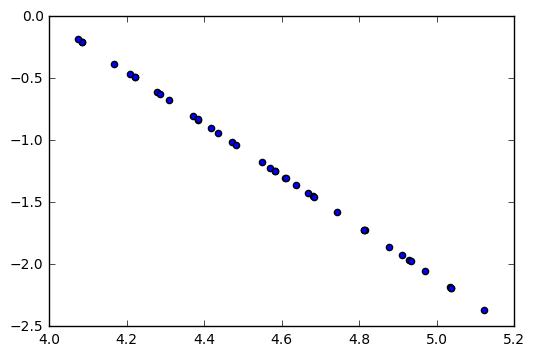